# Run an HLS composite data search quickly on a tile

This notebook provides an example of how to:
 - run a quick search to check # of available HLS scenes for a HLS seasonal greenest pixel composite on a focal tile  
 - run that a composite  
 
Each tile is 3000 x 3000 pixels at 30 m resolution

Paul Montesano, PhD

In [13]:
import os, sys
ICESAT2_BOREAL_REPO_PATH = '/projects/code/icesat2_boreal/lib' 
sys.path.append(ICESAT2_BOREAL_REPO_PATH)

In [3]:
FOCAL_TILE = 2422

#### HLS composite parameters

In [ ]:
YEAR = 2014
SEASON_START = '07-01'
SEASON_STOP = '08-31' 
MAX_CLOUDS = 10
MS_DATA_TYPE = 'HLS'

In [5]:
INDEX_FN =  'https://maap-ops-workspace.s3.amazonaws.com/shared/montesano/databank/boreal_tiles_v004.gpkg'
INDEX_LYR = 'boreal_tiles_v004'
SAT_API = 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'
OUTDIR = '/projects/my-private-bucket/tmp'

args = f"-i {INDEX_FN} \
-lyr {INDEX_LYR} \
-a {SAT_API} \
--tile_buffer_m 0 \
--in_tile_num {FOCAL_TILE} \
-o {OUTDIR} \
-sy {YEAR} -ey {YEAR} -smd {SEASON_START} -emd {SEASON_STOP} -mc {MAX_CLOUDS} \
--composite_type {MS_DATA_TYPE} \
--hls_product H30 \
--rangelims_red 0 1 \
--thresh_min_ndvi -1"

### Run HLS search only 
this is fast - no compositing - it tells you how many HLS scenes are available for this tile based on parameters

In [6]:
cmd = f'python /projects/code/icesat2_boreal/lib/3.1.2_dps.py {args} --search_only'
!echo $cmd
!eval $cmd

python /projects/code/icesat2_boreal/lib/3.1.2_dps.py -i https://maap-ops-workspace.s3.amazonaws.com/shared/montesano/databank/boreal_tiles_v004.gpkg -lyr boreal_tiles_v004 -a https://cmr.earthdata.nasa.gov/stac/LPCLOUD --tile_buffer_m 0 --in_tile_num 2422 -o /projects/my-private-bucket/tmp -sy 2014 -ey 2014 -smd 07-01 -emd 08-31 -mc 10 --composite_type HLS --hls_product H30 --rangelims_red 0 1 --thresh_min_ndvi -1 --search_only

Tiles path:		 https://maap-ops-workspace.s3.amazonaws.com/shared/montesano/databank/boreal_tiles_v004.gpkg
Tile number:		 2422
Output res (m):		 30
in_bbox:		 [-1791478.0000000047, 4113304.0000000093, -1701478.0000000047, 4203304.000000009]
bbox 4326:		 [125.65378735345928, 70.23761759131604, 129.10749149273934, 71.38291000560454]
Getting output dims from buffered (buffer=0.0) original tile geometry...
Output dims:		3000 x 3000
Composite type:		HLS

Getting HLS data...
bbox: [125.65378735345928, 70.23761759131604, 129.10749149273934, 71.38291000560454]

Queryi

### Run HLS composite 
if params return:  
`>` ~100 scenes maybe this could take 15-25 mins?  
`>` ~175 scenes maybe too much for 32Gb of RAM?

In [16]:
%%time
cmd = f'python /projects/code/icesat2_boreal/lib/3.1.2_dps.py {args}'
!echo $cmd
!eval $cmd

python /projects/code/icesat2_boreal/lib/3.1.2_dps.py -i https://maap-ops-workspace.s3.amazonaws.com/shared/montesano/databank/boreal_tiles_v004.gpkg -lyr boreal_tiles_v004 -a https://cmr.earthdata.nasa.gov/stac/LPCLOUD --tile_buffer_m 0 --in_tile_num 2422 -o /projects/my-private-bucket/tmp -sy 2014 -ey 2014 -smd 07-01 -emd 08-31 -mc 10 --composite_type HLS --hls_product H30 --rangelims_red 0 1 --thresh_min_ndvi -1

Tiles path:		 https://maap-ops-workspace.s3.amazonaws.com/shared/montesano/databank/boreal_tiles_v004.gpkg
Tile number:		 2422
Output res (m):		 30
in_bbox:		 [-1791478.0000000047, 4113304.0000000093, -1701478.0000000047, 4203304.000000009]
bbox 4326:		 [125.65378735345928, 70.23761759131604, 129.10749149273934, 71.38291000560454]
Getting output dims from buffered (buffer=0.0) original tile geometry...
Output dims:		3000 x 3000
Composite type:		HLS

Getting HLS data...
bbox: [125.65378735345928, 70.23761759131604, 129.10749149273934, 71.38291000560454]

Querying STAC...
sta

## Plot the HLS composite

In [17]:
import plotlib
import rasterio
from rasterio.plot import show_hist, show
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import importlib
importlib.reload(plotlib)

<module 'plotlib' from '/projects/code/icesat2_boreal/lib/plotlib.py'>

In [19]:
fn = '/projects/my-private-bucket/tmp/HLS_2422_07-01_08-31_2014_2014.tif'

In [20]:
outdir = os.path.dirname(fn)
rescaled_multiband_fn = os.path.join(outdir, os.path.basename(fn).replace('.tif','_rescaled_3band_temp.tif'))
print(rescaled_multiband_fn)
plotlib.rescale_multiband_for_plot(fn, rescaled_multiband_fn, bandlist = [6,4,3], pct=[25,85], nodata=-9999.0) 

/projects/my-private-bucket/tmp/HLS_2422_07-01_08-31_2014_2014_rescaled_3band_temp.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3000, 'height': 3000, 'count': 21, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",180],PARAMETER["standard_parallel_1",50],PARAMETER["standard_parallel_2",70],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, -1791478.0000000047,
       0.0, -30.0, 4203304.000000009), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}


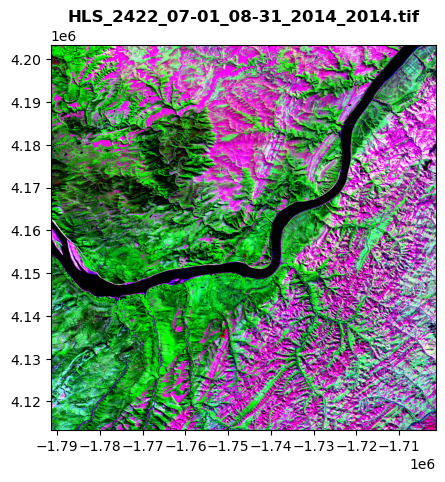

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
with rasterio.open(rescaled_multiband_fn) as src:
    show(src.read(),transform=src.transform, ax=ax, title=os.path.basename(fn))